# Predicting Disaster Tweets using Bag of Words

## Download and Extract Data

In [1]:
import os
from zipfile import ZipFile 

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [3]:
!kaggle competitions download -c nlp-getting-started -p data

nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
os.listdir('data')

['nlp-getting-started.zip', 'sample_submission.csv', 'test.csv', 'train.csv']

In [5]:
file_path = 'data/nlp-getting-started.zip'
cwd = os.getcwd() + '/data'

with ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(cwd)

## Import Data using Pandas 

In [6]:
import pandas as pd

In [7]:
raw_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sub_df = pd.read_csv('data/sample_submission.csv')

In [8]:
raw_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
raw_df['target'].unique()

array([1, 0], dtype=int64)

In [10]:
disaster_df = raw_df[raw_df.target == 1]

In [11]:
non_disaster_df = raw_df[raw_df.target == 0]

In [12]:
disaster_df.text.values[:10]

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       '13,000 people receive #wildfires evacuation orders in California ',
       'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
       '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
       '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
       "I'm on top of the hill and I can see a fire in the woods...",
       "There's an emergency evacuation happening now in the building across the street",
       "I'm afraid that the tornado is coming to our area..."],
      dtype=object)

In [13]:
non_disaster_df.text.values[:10]

array(["What's up man?", 'I love fruits', 'Summer is lovely',
       'My car is so fast', 'What a goooooooaaaaaal!!!!!!',
       'this is ridiculous....', 'London is cool ;)', 'Love skiing',
       'What a wonderful day!', 'LOOOOOOL'], dtype=object)

In [14]:
raw_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [15]:
raw_df['target'].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

## Visualize Training Data 

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
all_text = ' '.join(raw_df['text'])

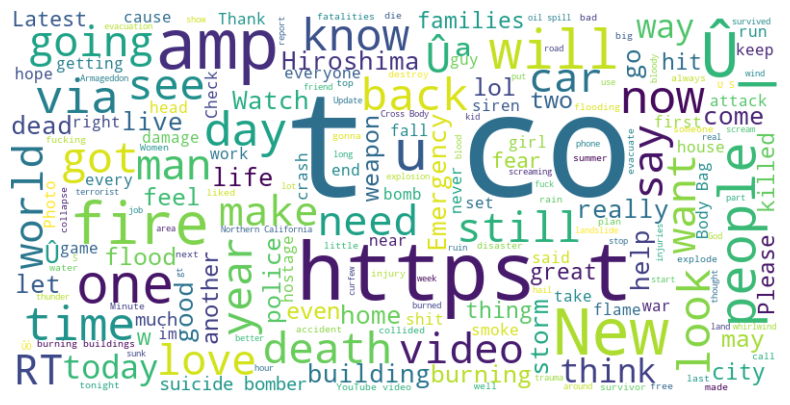

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Preprocessing Techniques

In [19]:
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [20]:
def preprocess_tweet(tweet):
    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove @username
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

In [21]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=preprocess_tweet)

In [22]:
vectorizer.fit(raw_df.text)

CountVectorizer(tokenizer=<function preprocess_tweet at 0x0000016596635120>)

In [23]:
inputs = vectorizer.transform(raw_df.text)

In [24]:
test_inputs = vectorizer.transform(test_df.text)

In [25]:
inputs.shape

(7613, 11208)

## Model Building 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_val, y_train, y_val = train_test_split(inputs, raw_df.target, test_size=0.2, random_state=42)

In [28]:
from xgboost import XGBClassifier

In [29]:
model = XGBClassifier()

In [30]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
train_preds = model.predict(y_train)
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
pd.Series(y_train).value_counts()

0    3468
1    2622
Name: target, dtype: int64

## Evaluate Model

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
y_pred = model.predict(X_val)

In [35]:
pd.Series(y_pred).value_counts()

0    984
1    539
dtype: int64

In [36]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

In [37]:
scores = [(recall, precision, f1, accuracy)]

metric = pd.DataFrame(scores, columns=['Recall','Precision','F1 Score', 'Accuracy'])
metric.insert(0, 'Model', 'XGBoost')
metric

,Model,Recall,Precision,F1 Score,Accuracy
0,XGBoost,0.661017,0.795918,0.722222,0.783322


## Make Predictions on Test Data

In [38]:
## Re-train model on all dataset
model = XGBClassifier()
model.fit(inputs, raw_df.target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
test_preds = model.predict(test_inputs)

In [40]:
test_preds

array([1, 1, 1, ..., 0, 1, 0])

In [41]:
sub_df

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [42]:
sub_df.target = test_preds

In [43]:
sub_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,0
3261,10874,1


In [44]:
sub_df.to_csv('submission.csv', index=None)

## Save Model

In [45]:
import joblib

In [46]:
single_input = pd.DataFrame([{'text': 'Sinners in the hand of angry God!'}])

In [47]:
single_input

,text
0,Sinners in the hand of angry God!


In [48]:
user_input = vectorizer.transform(single_input.text)

In [49]:
model.predict(user_input)

array([0])

In [50]:
mapping = {
    'vectorizer': vectorizer,
    'model': model
}

In [51]:
joblib.dump(mapping, 'model.joblib')

['model.joblib']